<a href="https://colab.research.google.com/github/FatemehImanizadeh/AI-Course-by-SUT-/blob/main/RMSE_vs_Degree_in_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RMSE
**Calculate error**

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def calculate_rmse (y_real, y_train):
    mse = ((y_real - y_train)**2).mean()
    rmse = np.sqrt(mse)
    return rmse

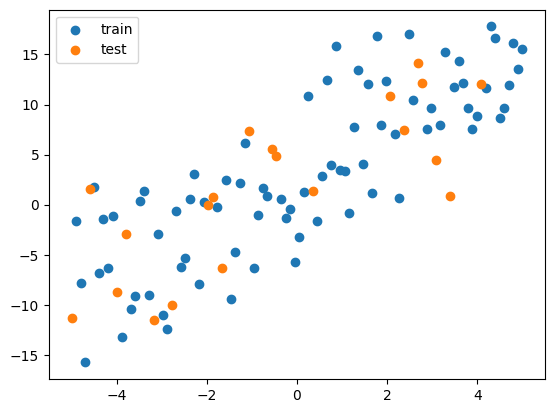

In [66]:
X = np.linspace(-5 , 5, 100)
noise = 5
y = 2*X + 3 + np.random.randn(100)*noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [13]:
def features_poly(X, degree):
  x_features = np.c_[np.ones((len(X), 1))]
  for i in range(1, degree + 1):
    x_features = np.c_[x_features, np.power(X, i)]
  return x_features

In [14]:
def closed_form_poly_w(X, y, degree):
  x_features = features_poly(X, degree)
  w = np.linalg.inv(x_features.T @ x_features) @ x_features.T @ y
  return w

In [15]:
def y_predict_poly(X , y, degree):
  w_poly = closed_form_poly_w(X, y,degree)
  x_features = features_poly(X, degree)
  predicted_Y =  x_features @ w_poly.T
  return predicted_Y

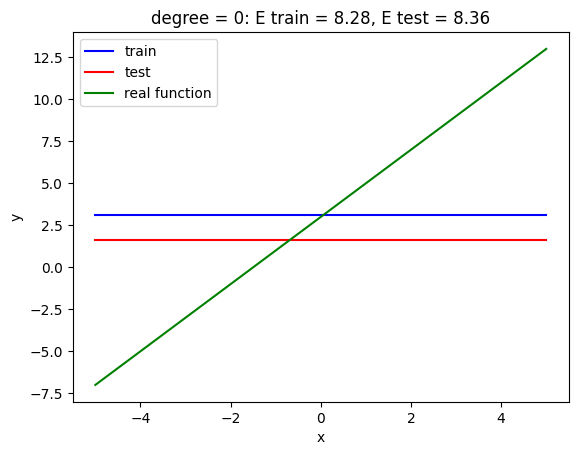

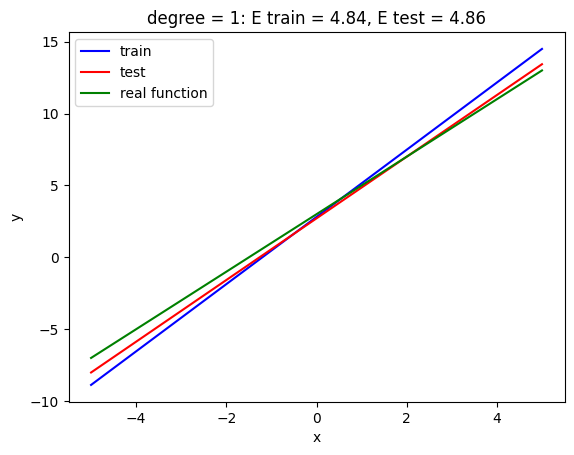

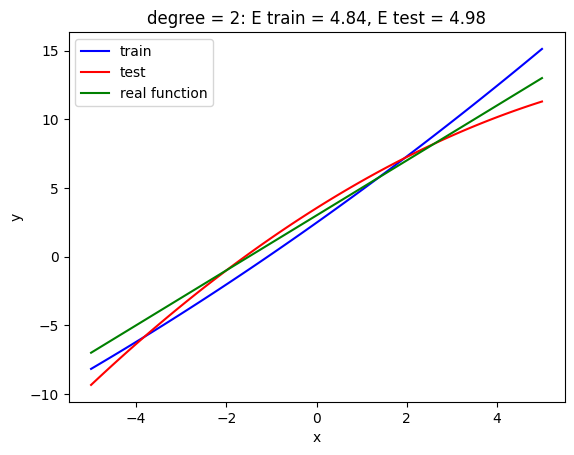

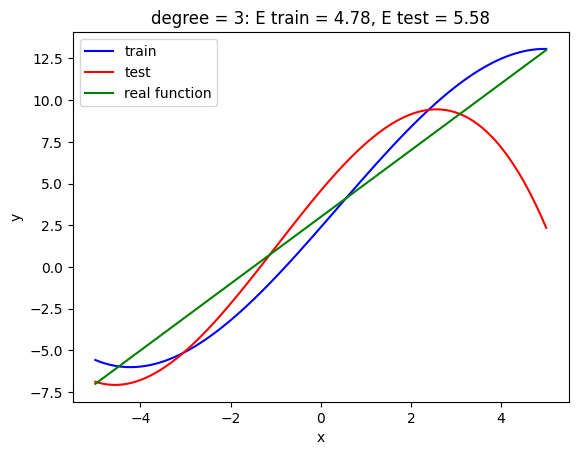

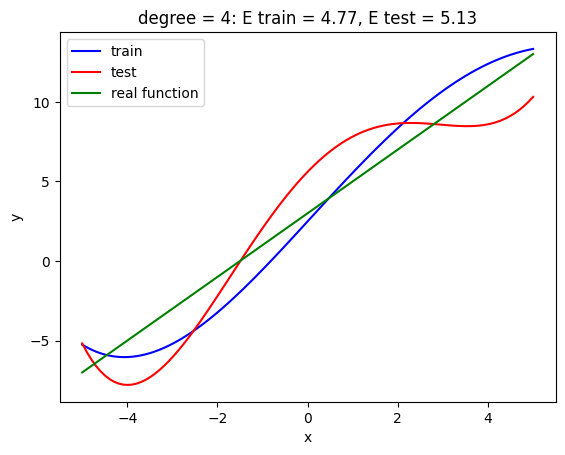

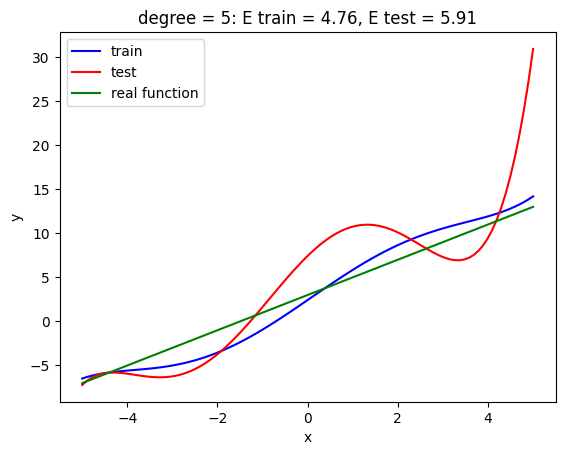

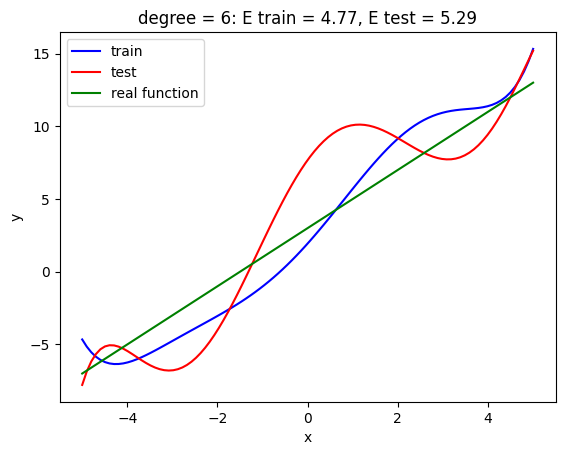

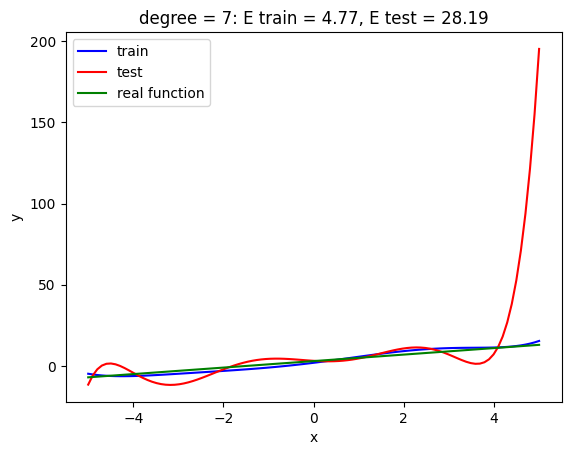

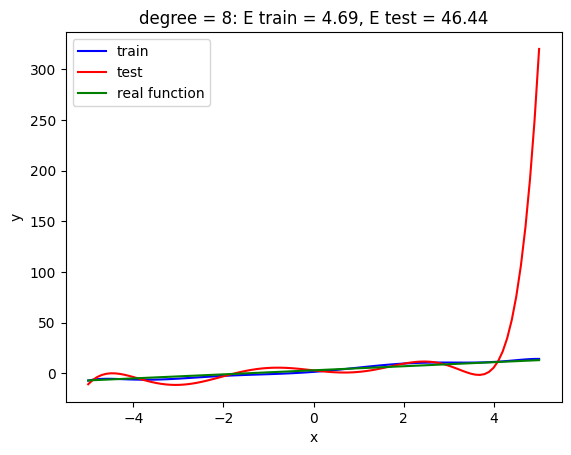

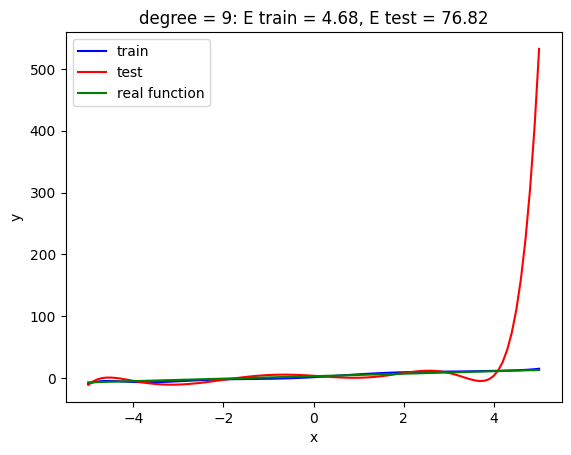

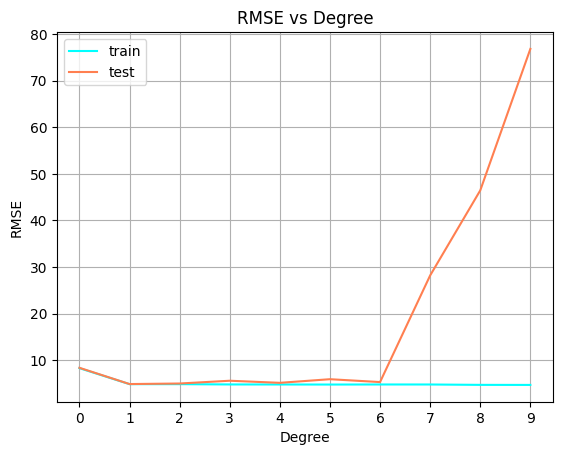

In [79]:
rms_train_all = []
rms_test_all = []
degrees = range(0, 10)
for d in degrees:
  wfeatures_train = closed_form_poly_w(X_train,y_train,  d)
  wfeatures_test = closed_form_poly_w(X_test,y_test,  d)
  features= features_poly(X, d)

  #predicted_y_train = y_predict_poly(X_train, y_train, d)
 # predicted_y_test = y_predict_poly(X_test, y_test, d)

  predicted_y_train = features @ wfeatures_train.T
  predicted_y_test = features @ wfeatures_test.T
  rms_train_e = calculate_rmse(y, predicted_y_train)
  rms_test_e = calculate_rmse(y, predicted_y_test)
  rms_train_all.append(rms_train_e)
  rms_test_all.append(rms_test_e)

  sorted_pairs_train = sorted(zip(X, predicted_y_train))
  sorted_pairs_test = sorted(zip(X, predicted_y_test))
  x_train_sorted, y_train_sorted = zip(*sorted_pairs_train)
  x_test_sorted, y_test_sorted = zip(*sorted_pairs_test)
# Convert back to lists if needed
  plt.plot(x_train_sorted, y_train_sorted, color = 'blue', label ="train" )
  plt.plot(x_test_sorted, y_test_sorted, color = 'red', label ="test")
  plt.plot(X, 2*X+3, color = 'green', label =f"real function")

  plt.title(f"degree = {d}: E train = {rms_train_e:.2f}, E test = {rms_test_e:.2f}")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()
plt.plot(degrees, rms_train_all, color = 'aqua', label='train')
plt.plot(degrees, rms_test_all, color = 'coral', label='test')
plt.title('RMSE vs Degree')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()


**Feature Engineering**
the charts show that in higher degrees though we have fit the model with all train data but the model fails on test set because of high variance,
in lower degrees the model has high rmse in both train and test and the bias is high.
